## Import

In [ ]:
install.packages(c("here", "statmod"))
devtools::install_github("yanlinlin82/ggvenn")

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# First, let's load all the packages we will need to analyse the data.
library(edgeR)
library(ggplot2)
library(ggsci)
library(gplots)
library(here)
library(limma)
library(RColorBrewer)
library(tidyverse)
library(ggvenn)

## Reading data

In [ ]:
x <- readRDS("./output/for_publication/x_with_correction.rds")

In [ ]:
logcounts <- readRDS("./output/for_publication/logcounts.rds")

In [ ]:
seq_tab <- readRDS("./output/for_publication/seq_tab.rds")

In [ ]:
summa.fit.B <- readRDS("./output/for_publication/summa.fit.B.rds")
summa.fit.L <- readRDS("./output/for_publication/summa.fit.L.rds")

## Cluster heatmap

In [ ]:
rld_cor <- cor(x$counts)
rld_cor

,CON_1,CON_2,CON_3,HHP.10MIN_1,HHP.10MIN_2,HHP.10MIN_3,HHP.2H_1,HHP.2H_2,HHP.2H_3,HHP.24H_1,HHP.24H_2,HHP.24H_3
CON_1,1.0000000,0.9953636,0.9953507,0.9953409,0.9948483,0.9813396,0.9951139,0.9989064,0.9983433,0.9872158,0.9870837,0.9857484
CON_2,0.9953636,1.0000000,0.9952304,0.9986823,0.9993532,0.9937673,0.9990600,0.9947532,0.9915708,0.9957555,0.9924620,0.9898279
CON_3,0.9953507,0.9952304,1.0000000,0.9930225,0.9952051,0.9825505,0.9968726,0.9949859,0.9942072,0.9862215,0.9842008,0.9773381
HHP.10MIN_1,0.9953409,0.9986823,0.9930225,1.0000000,0.9987457,0.9926862,0.9979035,0.9935441,0.9911939,0.9958424,0.9956909,0.9937114
HHP.10MIN_2,0.9948483,0.9993532,0.9952051,0.9987457,1.0000000,0.9942104,0.9990350,0.9933836,0.9904436,0.9957149,0.9930825,0.9898064
HHP.10MIN_3,0.9813396,0.9937673,0.9825505,0.9926862,0.9942104,1.0000000,0.9926364,0.9792897,0.9722204,0.9939596,0.9898542,0.9861019
HHP.2H_1,0.9951139,0.9990600,0.9968726,0.9979035,0.9990350,0.9926364,1.0000000,0.9941971,0.9914791,0.9944446,0.9927832,0.9880929
HHP.2H_2,0.9989064,0.9947532,0.9949859,0.9935441,0.9933836,0.9792897,0.9941971,1.0000000,0.9986371,0.9864127,0.9838029,0.9832519
HHP.2H_3,0.9983433,0.9915708,0.9942072,0.9911939,0.9904436,0.9722204,0.9914791,0.9986371,1.0000000,0.9821629,0.9816145,0.9804308
HHP.24H_1,0.9872158,0.9957555,0.9862215,0.9958424,0.9957149,0.9939596,0.9944446,0.9864127,0.9821629,1.0000000,0.9967572,0.9954079


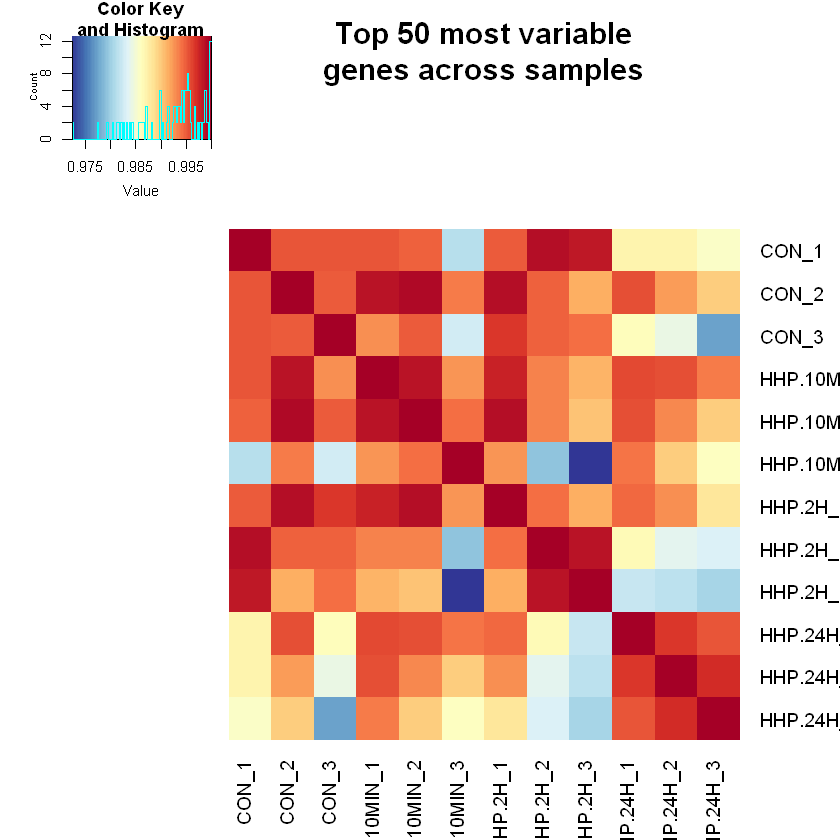

In [ ]:
# Get some nicer colours
mypalette <- brewer.pal(11, "RdYlBu")
morecols <- colorRampPalette(mypalette)
heatmap.2(rld_cor, col = rev(morecols(100)), dendrogram = "none", trace = "none",
    Rowv = FALSE, Colv = FALSE, main = "Top 50 most variable
genes across samples")

## Enhanced PCA plot

In [ ]:
axix_setting <- theme(axis.line = element_line(colour = "black", size = 1, linetype = "solid")) +
    theme(axis.ticks = element_line(colour = "black", size = 1), axis.ticks.length = unit(0.15,
        "cm"))

In [ ]:
df <- t(logcounts)
head(df)
df_pca <- prcomp(df)
head(df_pca)

,Xkr4,Gm38717,Sox17,Mrpl15,Lypla1,Tcea1,Rgs20,Atp6v1h,4732440D04Rik,Rb1cc1,...,Tmlhe,Zf12,Uba1y,Kdm5d,Eif2s3y,Uty,Gm39552,Ddx3y,Gm33272,LOC108168645
CON_1,5.740914,-0.64026009,2.386746,4.593938,5.377300,6.466520,4.773815,6.907579,3.338273,7.936774,...,3.420342,-1.170534,-1.880530,4.855987,5.634614,5.285389,2.338307,6.230042,2.324164,-2.339482
CON_2,5.644321,-0.67030162,2.314214,4.707018,5.384073,6.396515,4.806195,6.969296,3.392468,7.800860,...,3.227522,-1.668536,-1.048283,4.897823,5.718947,5.395701,2.460582,6.197836,2.672059,-2.558598
CON_3,5.544286,-0.74600705,2.462001,4.678187,5.379820,6.473295,4.543290,6.939796,3.074446,7.808648,...,3.220138,-1.980252,-1.520068,4.743236,5.579762,5.166123,1.739286,6.252516,2.145433,-3.607482
HHP.10MIN_1,5.677425,-0.39581966,2.316504,4.603392,5.331576,6.400810,4.724806,6.957828,3.396492,7.824111,...,3.011517,-2.068915,-1.224133,4.813862,5.622927,5.292827,1.968675,6.161792,2.390144,-3.061706
HHP.10MIN_2,5.691752,-0.07847506,2.531749,4.479874,5.384363,6.449260,4.844185,6.958874,3.253807,7.818721,...,3.317034,-2.137131,-1.377925,4.738756,5.651650,5.293794,1.764952,6.195782,2.281126,-2.863907
HHP.10MIN_3,5.740626,-0.10781921,2.247538,4.609288,5.356306,6.370477,4.779506,7.008933,3.226007,7.749311,...,3.391134,-1.256496,-1.723660,4.833229,5.626921,5.357121,2.450631,6.112527,2.492787,-3.405434


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
Xkr4,-8.004532e-03,0.0019601405,0.0050875582,-2.998010e-03,-3.486503e-06,8.164513e-04,-2.171903e-04,-0.0018879137,6.746528e-03,-0.0004777043,-0.0014114366,2.596574e-01
Gm38717,-6.673202e-04,-0.0059166085,-0.0027165584,7.946871e-03,-6.999383e-03,8.193051e-03,-9.483295e-03,0.0022608407,2.182660e-02,-0.0059290205,-0.0013092131,-5.130247e-02
Sox17,1.322636e-03,0.0030799664,0.0037099632,-8.054416e-03,-1.354381e-02,-2.592845e-03,-5.944780e-03,0.0015170307,2.014671e-03,-0.0020103279,-0.0010016345,-1.365726e-01
Mrpl15,-1.065492e-03,-0.0019088130,-0.0033829229,-6.880015e-04,-1.801482e-03,1.331683e-03,1.136534e-03,-0.0041866726,-5.155014e-03,0.0002438588,-0.0002429566,-1.448987e-01
Lypla1,-2.422096e-03,-0.0019620892,-0.0021905743,1.903284e-04,2.506817e-03,-1.776509e-03,-1.652913e-03,-0.0002800272,-1.370166e-03,0.0009096815,-0.0010429985,-3.069624e-01
Tcea1,-3.588294e-03,0.0015526563,-0.0012106804,1.395998e-03,-7.819119e-04,-1.064750e-03,-1.917284e-03,0.0006269889,-7.076290e-04,0.0002373853,-0.0009153386,2.171099e-02
Rgs20,-2.122280e-03,0.0024039366,0.0070926224,5.895305e-05,3.289152e-04,1.977869e-03,-5.575226e-03,-0.0034851992,7.123308e-03,-0.0018298941,-0.0020976058,4.571284e-01
Atp6v1h,7.034584e-03,-0.0028778947,-0.0035096885,1.462506e-04,6.396900e-04,1.735888e-04,1.215232e-03,-0.0002857232,-2.809435e-04,-0.0003500300,-0.0002258596,7.796552e-02
4732440D04Rik,2.112636e-03,0.0046706581,0.0050194541,-2.025890e-03,8.409062e-03,3.723221e-03,-9.616155e-04,-0.0019472010,1.151243e-03,-0.0017224931,-0.0026668236,-8.064560e-03
Rb1cc1,3.308819e-03,0.0047970735,-0.0006758020,-1.466357e-03,2.479306e-04,-1.330998e-03,4.008579e-04,-0.0003968081,1.918003e-04,-0.0011341326,-0.0006694571,-1.063331e-01


In [ ]:
df_out <- as.data.frame(df_pca$x)
df_out$group <- sapply(strsplit(as.character(row.names(df)), "_"), "[[", 1)
head(df_out)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,group
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
CON_1,-16.663117,14.1495078,-7.7607744,-7.248744,6.1798067,-16.503024,2.703906,-8.732970,2.901032,-4.7091409,1.535805,-1.817025e-14,CON
CON_2,-9.993953,-9.4023495,7.3568475,-5.294473,5.8822074,3.177769,-4.701023,-15.419703,-12.399760,0.4584322,-3.633766,3.878039e-14,CON
CON_3,-16.536965,-3.1986225,-5.4985790,-1.497562,-10.0879815,-8.979748,3.483091,8.871065,-15.374684,4.7500214,2.144436,5.463165e-14,CON
HHP.10MIN_1,-13.793253,-0.6176071,-3.7419376,-11.712994,6.7423699,18.528882,2.461716,10.288867,-2.752968,-4.7822350,1.558672,3.780960e-14,HHP.10MIN
HHP.10MIN_2,-10.005682,-7.2529207,-0.4787276,-4.283892,0.7505385,-8.737512,-14.865060,12.874148,9.359241,0.1826028,-3.638675,5.878197e-14,HHP.10MIN
HHP.10MIN_3,-13.133468,-18.0369010,-2.4542896,-1.629225,1.3508226,2.393483,9.673540,-7.075698,14.053437,4.5519313,2.041440,4.345569e-14,HHP.10MIN


In [ ]:
percentage <- round(df_pca$sdev/sum(df_pca$sdev) * 100, 2)
percentage <- paste(colnames(df_out), "(", paste(as.character(percentage), "%", ")",
    sep = ""))

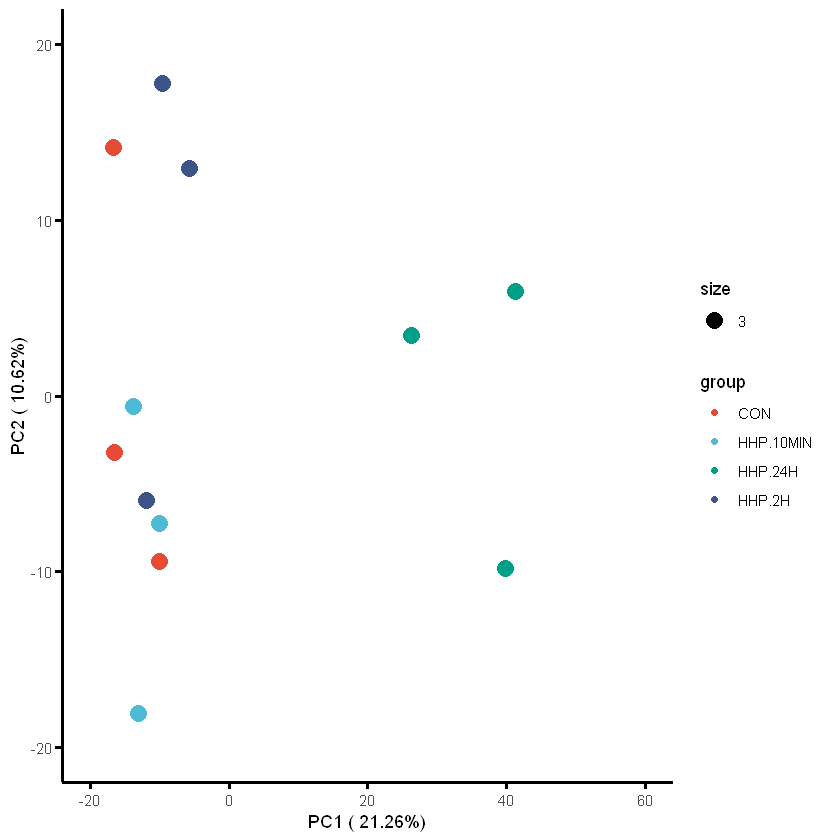

In [ ]:
p <- ggplot(df_out, aes(x = PC1, y = PC2, color = group, size = 3)) + geom_point() +
    xlab(percentage[1]) + ylab(percentage[2]) + expand_limits(x = c(-20, 60), y = c(-20,
    20))
p + theme_classic() + axix_setting + scale_color_npg()

## Enhanced volcano plot

In [ ]:
head(seq_tab)

,SYMBOL,ENTREZID,GENENAME,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Slc39a10,Cryba2,12958,"crystallin, beta A2",1.3870548,6.676081,20.62061,6.159103e-12,3.539020e-08,17.79937
Pdrg1,NA,NA,NA,0.9802359,5.423744,20.71055,5.802912e-12,3.539020e-08,17.77544
Calr3,NA,NA,NA,1.7966531,2.194304,23.26843,1.172196e-12,2.020631e-08,17.25258
Sprn,NA,NA,NA,-1.2782075,4.728404,-17.26520,6.900518e-11,2.899543e-07,15.24520
Stat1,Des,13346,desmin,-0.8163297,6.222543,-16.59439,1.177764e-10,2.899543e-07,14.90211
Rnasel,Pbld2,67307,phenazine biosynthesis-like protein domain containing 2,0.7185141,4.521310,16.65980,1.116977e-10,2.899543e-07,14.87874


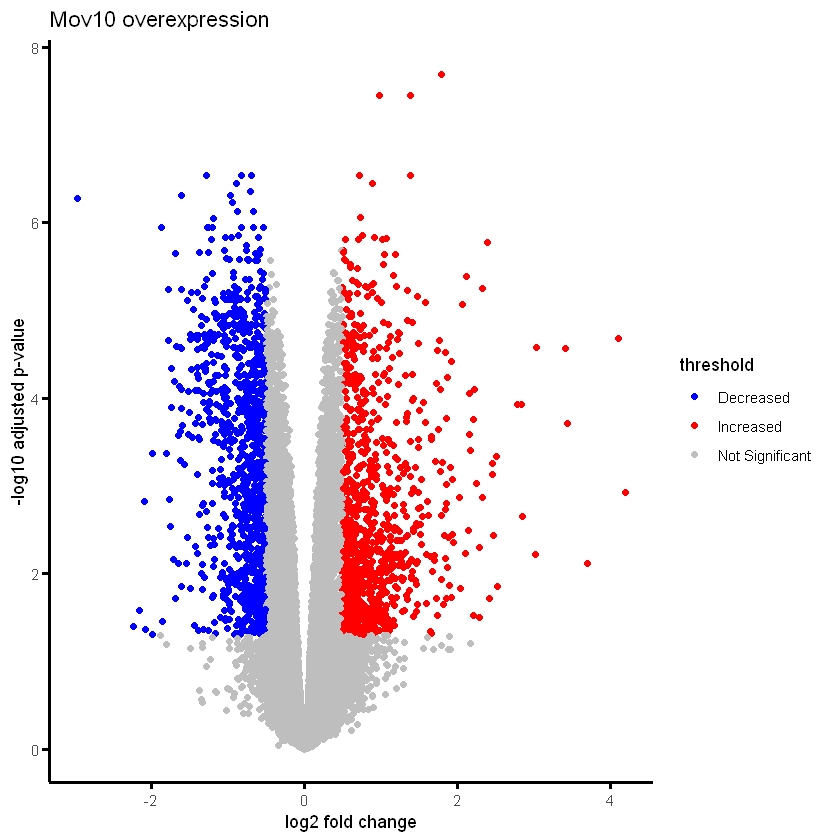

In [ ]:
## Volcano plot
seq_tab$threshold <- ifelse(seq_tab$logFC > 0.5 & seq_tab$adj.P.Val < 0.05, "Increased",
    ifelse(seq_tab$logFC < -0.5 & seq_tab$adj.P.Val < 0.05, "Decreased", "Not Significant"))

p <- ggplot(seq_tab) + geom_point(aes(x = logFC, y = -log10(adj.P.Val), color = threshold)) +
    ggtitle("Mov10 overexpression") + xlab("log2 fold change") + ylab("-log10 adjusted p-value") +
    # + scale_y_continuous(limits = c(0, 50))
theme(legend.position = "none", plot.title = element_text(size = rel(1.5), hjust = 0.5),
    axis.title = element_text(size = rel(1.25))) + theme_classic() + scale_color_manual(values = c("blue",
    "red", "grey"))
p + axix_setting

## Enhanced Venn plot

In [ ]:
summary(summa.fit.B)
summary(summa.fit.L)

       convs24h
Down       1017
NotSig    15267
Up          954

       treatmenthhp.24hr
Down                 958
NotSig             15676
Up                   749

In [ ]:
ComBat_seq <- rownames(summa.fit.B[(summa.fit.B == 1 | summa.fit.B == -1), ])
edgeR <- rownames(summa.fit.L[(summa.fit.L == 1 | summa.fit.L == -1), ])

head(ComBat_seq)
head(edgeR)

[1] "Gm26901"       "1700034P13Rik" "Gm39590"       "Tcf24"        
[5] "Gm31523"       "Pi15"

[1] "Gm26901"       "1700034P13Rik" "Gm39590"       "Pi15"         
[5] "Mcm3"          "Tram2"

In [ ]:
x <- list(A = ComBat_seq, B = edgeR)
head(x)

$A
   [1] "Gm26901"       "1700034P13Rik" "Gm39590"       "Tcf24"        
   [5] "Gm31523"       "Pi15"          "Mcm3"          "Tram2"        
   [9] "Neurl3"        "4933424G06Rik" "Gm39633"       "Fhl2"         
  [13] "Gm39635"       "Col3a1"        "Dnah7c"        "Slc39a10"     
  [17] "Stat1"         "1700019D03Rik" "Stk17b"        "9130024F11Rik"
  [21] "Mpp4"          "Pard3b"        "Gm35252"       "Gm13749"      
  [25] "Mir6899"       "Gm35803"       "2810408I11Rik" "Ccnyl1"       
  [29] "Erbb4"         "Bard1"         "Gm39663"       "Wnt6"         
  [33] "Ihh"           "Nhej1"         "Slc23a3"       "Tuba4a"       
  [37] "Des"           "Col4a4"        "Gm34450"       "Sp110"        
  [41] "Gpr55"         "Efhd1"         "Ugt1a1"        "Glrp1"        
  [45] "Mlph"          "Traf3ip1"      "Crocc2"        "Gm28535"      
  [49] "Pask"          "Bok"           "Gm7967"        "Gm41927"      
  [53] "Gm7160"        "Gm26509"       "Serpinb5"      "Serpinb2"     
  [57] "Gm32810"       "2900060B14Rik" "Gli2"          "Gm41934"      
  [61] "C1ql2"         "Gm35243"       "2900009J06Rik" "Map3k19"      
  [65] "Mcm6"          "Cd55b"         "AA986860"      "Fcmr"         
  [69] "Mfsd4a"        "Klhdc8a"       "Gm31159"       "Prelp"        
  [73] "Ube2t"         "Ptpn7"         "Gm4793"        "Gm32835"      
  [77] "Csrp1"         "Kif14"         "Gm34353"       "Aspm"         
  [81] "B3galt2"       "Ptgs2"         "Prg4"          "Hmcn1"        
  [85] "Gm25279"       "Lamc1"         "Npl"           "Rgs8"         
  [89] "Rgs16"         "Rnasel"        "Acbd6"         "Sec16b"       
  [93] "Gpr52"         "Pigc"          "Fmo1"          "Fmo2"         
  [97] "Prrx1"         "BC055324"      "Mettl18"       "Sele"         
 [101] "Selp"          "Slc19a2"       "Dpt"           "Nuf2"         
 [105] "Gm39698"       "Dusp12"        "Gm39701"       "Apoa2"        
 [109] "Fcer1g"        "Klhdc9"        "Slamf7"        "Vangl2"       
 [113] "Aim2"          "Ifi204"        "Mndal"         "Ifi203"       
 [117] "Exo1"          "Hmga2-ps1"     "Gm31349"       "Ephx1"        
 [121] "Dnah14"        "Gm37896"       "Cenpf"         "Nsl1"         
 [125] "Dtl"           "Nek2"          "Slc30a1"       "A730013G03Rik"
 [129] "Irf6"          "Traf3ip3"      "Camk1g"        "Gm16897"      
 [133] "Gm39749"       "A330023F24Rik" "Fbxo5"         "Ulbp1"        
 [137] "1700016L04Rik" "Nmbr"          "Gm20655"       "Txlnb"        
 [141] "Gm32926"       "Perp"          "Raet1e"        "Enpp1"        
 [145] "Enpp3"         "Gm9767"        "Arhgap18"      "Lama2"        
 [149] "Cenpw"         "Hey2"          "Rsph4a"        "Frk"          
 [153] "Gm33333"       "Gm15934"       "Gm20597"       "Cdh23"        
 [157] "Gm2137"        "Col13a1"       "Tet1"          "Dna2"         
 [161] "Rtkn2"         "Tmem26"        "Cdk1"          "Bicc1"        
 [165] "Gm34776"       "Gstt3"         "Gstt2"         "Gm16222"      
 [169] "Gm10941"       "Cstb"          "C2cd4c"        "Fgf22"        
 [173] "Fstl3"         "Misp"          "Ptbp1"         "Cnn2"         
 [177] "Pcsk4"         "Reep6"         "Atp8b3"        "Tmprss9"      
 [181] "Lmnb2"         "Gadd45b"       "Mir1191b"      "Celf5"        
 [185] "Gm33378"       "Glt8d2"        "Gm40723"       "Gm40728"      
 [189] "1810014B01Rik" "Ttc41"         "Gm30233"       "Parpbp"       
 [193] "Gm6653"        "Slc5a8"        "1500026H17Rik" "Gm31090"      
 [197] "Apaf1"         "Tmpo"          "Nr2c1"         "Gm29684"      
 [201] "Gm34114"       "Lrriq1"        "Mettl25"       "Gm29674"      
 [205] "Gm5136"        "E2f7"          "Lgr5"          "Mdm2"         
 [209] "Gm40780"       "Msrb3"         "Gm15910"       "Wif1"         
 [213] "Gm35696"       "Lrig3"         "Gm29997"       "Agap2"        
 [217] "Gli1"          "Ndufa4l2"      "Gm40802"       "Zbtb39"       
 [221] "Prim1"         "Gm26847"       "Myl6b"         "A430046D13Rik"
 [225] "Ikzf4"       

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



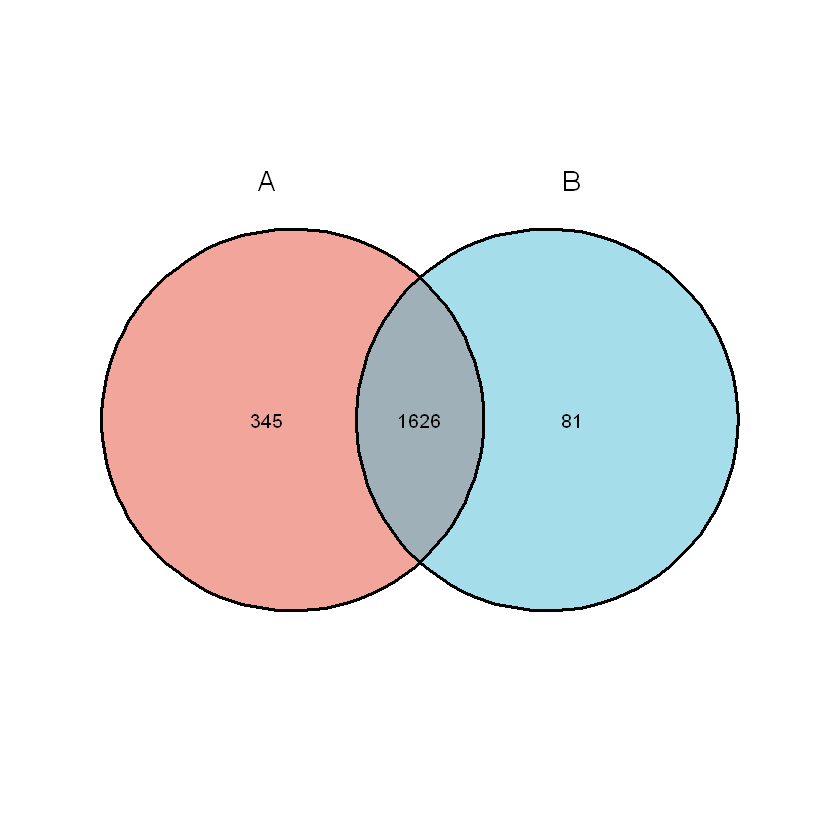

In [ ]:
ggvenn(x, show_percentage = FALSE, show_elements = FALSE) + scale_fill_npg()

## Save figures

In [ ]:
ggsave("1.png", dpi = 300, height = 8, width = 8)